<a href="https://colab.research.google.com/github/Jueunkim429/Human-Computer-Interaction/blob/main/Diagnosing_Breast_Cancer_Using_SVM%26kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 준비하기

In [52]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn

pkgs = [scipy, numpy, matplotlib, sklearn]
for pkg in pkgs : 
  print(f'{pkg.__name__}: {pkg.__version__}')

scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
sklearn: 1.0.2


In [53]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

# 데이터셋 로드하기

In [54]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names =['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion',
        'single_epthelial_size', 'bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url, names=names)

# 데이터 전처리와 데이터 탐색

## 1) 결측값 처리

In [55]:
#data preprocessing
df.replace('?',-99999, inplace=True) #? 처리된 결측값을 -99999로 바꾸기
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epthelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [56]:
df.drop(columns='id', axis=1, inplace=True) # 필요없는 데이터 제거
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epthelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## 2) 데이터 탐색

In [32]:
print(df.shape)

(699, 10)


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uniform_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniform_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single_epthelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# 데이터 전처리와 데이터 탐색

## 1) 데이터 탐색

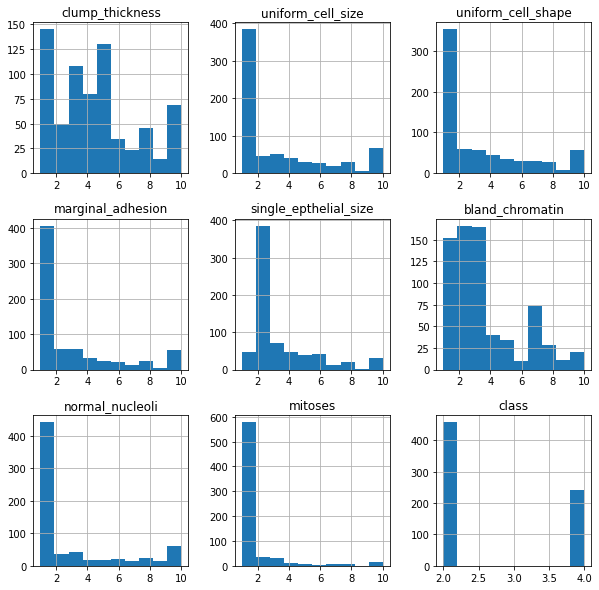

In [34]:
df.hist(figsize=(10,10))
plt.show()

## 2) 변수들 간의 관계

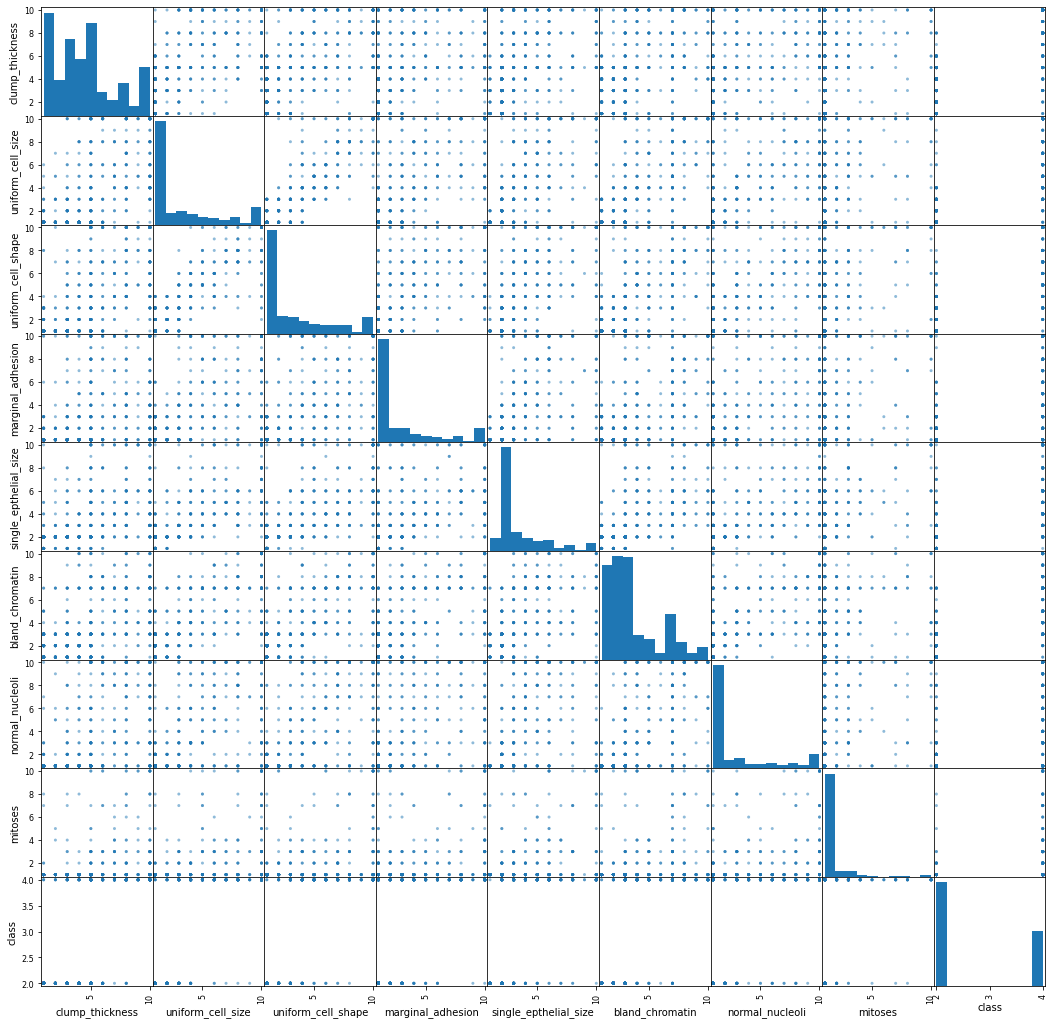

In [35]:
scatter_matrix(df, figsize=(18,18))
plt.show()

# 데이터셋 분리

In [36]:
X = np.array(df.drop(columns='class', axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

scoring='accuracy'

In [37]:
models = []
models.append(('KKN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC(gamma='auto')))

results=[]
names=[]

for name, model in models :
  kfold = model_selection.KFold(n_splits=10)
  cv_results=model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
  print(msg)

KKN: 0.966039 (0.025796)
SVM: 0.955292 (0.027931)


# 머신러닝을 사용한 예측

In [38]:
from traitlets.traitlets import ClassBasedTraitType
# prediction
for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(f'{name}: {accuracy_score(y_test, predictions)}')
  print(classification_report(y_test, predictions))

KKN: 0.9928571428571429
              precision    recall  f1-score   support

           2       1.00      0.99      0.99        83
           4       0.98      1.00      0.99        57

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

SVM: 0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        83
           4       0.92      1.00      0.96        57

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



# 하나의 사례에 대한 예측

In [43]:
clf = SVC(gamma='auto')

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example= np.array([[4,2,1,1,2,1,2,1,1]])
example = example.reshape(len(example),-1)
prediction=clf.predict(example)
print(prediction)

0.9642857142857143
[2]


In [44]:
print(df.loc[9])

clump_thickness          4
uniform_cell_size        2
uniform_cell_shape       1
marginal_adhesion        1
single_epthelial_size    2
bare_nuclei              1
bland_chromatin          2
normal_nucleoli          1
mitoses                  1
class                    2
Name: 9, dtype: object


### ex1

In [45]:
clf = SVC(gamma='auto')

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example= np.array([[5,3,3,3,2,3,4,4,1]])
example = example.reshape(len(example),-1)
prediction=clf.predict(example)
print(prediction)

0.9642857142857143
[4]


In [46]:
print(df.loc[9])

clump_thickness          4
uniform_cell_size        2
uniform_cell_shape       1
marginal_adhesion        1
single_epthelial_size    2
bare_nuclei              1
bland_chromatin          2
normal_nucleoli          1
mitoses                  1
class                    2
Name: 9, dtype: object


### ex2)

In [47]:
clf = SVC(gamma='auto')

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example= np.array([[7,3,2,10,5,10,5,4,4]])
example = example.reshape(len(example),-1)
prediction=clf.predict(example)
print(prediction)

0.9642857142857143
[4]


In [48]:
print(df.loc[9])

clump_thickness          4
uniform_cell_size        2
uniform_cell_shape       1
marginal_adhesion        1
single_epthelial_size    2
bare_nuclei              1
bland_chromatin          2
normal_nucleoli          1
mitoses                  1
class                    2
Name: 9, dtype: object
